#### 1.Implement forward and backward Euler methods (for vector valued functions)

In [1]:
#I get some guidance from another class note. Assume it is autonomous.
import numpy as np
import math
from numpy.linalg import inv
from copy import deepcopy

def forward_Euler(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        f_v = eval(func_name)(deepcopy(y_t[i-1,:]))
        y_t[i,:] = y_t[i-1,:]+h*f_v
    return s_t, y_t

def newton_solver(init_guess, yn, func_name, diff_func, h, error0=1e-10, max_iter=1000):
    #func_name origin function and diff_func is its derivative.
    error = 1.0
    guess = deepcopy(init_guess)
    iter = 0
    while((error > error0) and iter < max_iter):
        f_v = guess - yn - h*eval(func_name)(deepcopy(guess))
        n = guess.shape[0]
        if n == 1:
            f_v_d = 1 - h*eval(diff_func)(deepcopy(guess))
            change = f_v/f_v_d
        else:
            f_v_d = np.eye(n) - h*eval(diff_func)(deepcopy(guess))
            change = np.linalg.solve(f_v_d, f_v)
        guess = guess - change
        error = np.linalg.norm(change)
        iter = iter + 1
    return guess

def backward_Euler(func_name, diff_func, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        f_v_guess = y_t[i-1,:] + h*eval(func_name)(deepcopy(y_t[i-1,:]))
        y_t[i,:] = newton_solver(deepcopy(f_v_guess), deepcopy(y_t[i-1,:]), func_name, diff_func, h)
    return s_t, y_t

#### 2.Use both the forward and backward Euler methods on the three model problems

In [2]:
def i_func(y):
    return -23*y

def i_diff_func(y):
    return -23

def ii_func(y):
    return y

def ii_diff_func(y):
    return 1

def iii_func(y):
    y[0] = -y[0]
    y[1] = -100*y[1]
    return y

def iii_diff_func(y):
    return np.array([[-1, 0],[0, -100]])


#a1, b1 = forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,0.01], h=0.001)
#a2, b2 = backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,0.01], h=0.001)
#a1, b1 = forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,0.01], h=0.001)
#a2, b2 = backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,0.01], h=0.001)
steps = 10
H = [ 1*pow(0.5, steps-i) for i in range(steps)]
H_p = [np.log(i) for i in H]
import matplotlib.pyplot as plt

##### a. compute errors and compare the two methods

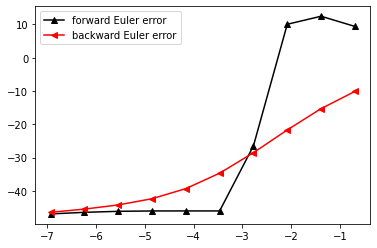

In [3]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)

for s in range(steps):
    f_s, f_a =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(-23*f_s[-1])))
    b_s, b_a =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(-23*b_s[-1])))

plt.plot(H_p, F_e, color='black', marker='^')
plt.plot(H_p, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

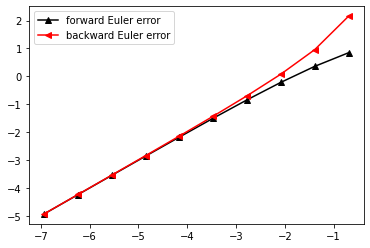

In [4]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)

for s in range(steps):
    f_s, f_a =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(f_s[-1])))
    b_s, b_a =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(b_s[-1])))

plt.plot(H_p, F_e, color='black', marker='^')
plt.plot(H_p, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

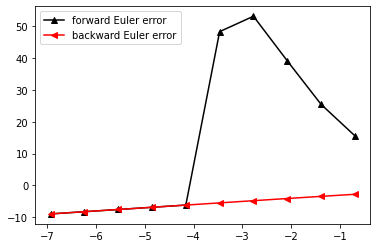

In [5]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)

for s in range(steps):
    f_s, f_a =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(np.array([-f_s[-1], -100*f_s[-1]]))))
    
    b_s, b_a =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(np.array([-b_s[-1], -100*b_s[-1]]))))

plt.plot(H_p, F_e, color='black', marker='^')
plt.plot(H_p, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

##### a.Comment

Forward Euler and Backward Euler are both the first-order method, so we can see when h is small enough they share a similar error result.

We also can see that Backward Euler performs well when h is large and this experiment result shows the stability of Backward Euler. For Forward Euler, it sometimes perform better than Backward Euler but can not gurantee its stability when h is large.

Also，from the theoretical aspect， we know when h is larger than $-\frac{2}{\lambda}$ we will meet instability for Forward Euler method. As we can see, (i) and (iii) are unstable when h is larger than $-\frac{2}{\lambda}$. And for (ii) we know it is always stable since h $\ge$ -2. For Backward Euler, we know it is always stable.

##### b. consider the extra work required when computing with the backward Euler method.

In [6]:
def forward_Euler(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        f_v = eval(func_name)(deepcopy(y_t[i-1,:]))
        y_t[i,:] = y_t[i-1,:]+h*f_v
    return s_t, y_t, num_interval

def newton_solver(init_guess, yn, func_name, diff_func, h, error0=1e-10, max_iter=1000):
    #func_name origin function and diff_func is its derivative.
    error = 1.0
    guess = deepcopy(init_guess)
    iter = 0
    while((error > error0) and iter < max_iter):
        f_v = guess - yn - h*eval(func_name)(deepcopy(guess))
        n = guess.shape[0]
        if n == 1:
            f_v_d = 1 - h*eval(diff_func)(deepcopy(guess))
            change = f_v/f_v_d
        else:
            f_v_d = np.eye(n) - h*eval(diff_func)(deepcopy(guess))
            change = np.linalg.solve(f_v_d, f_v)
        guess = guess - change
        error = np.linalg.norm(change)
        iter = iter + 1
    return guess, iter

def backward_Euler(func_name, diff_func, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    sum_iter = num_interval
    for i in range(1, num_interval+1):
        f_v_guess = y_t[i-1,:] + h*eval(func_name)(deepcopy(y_t[i-1,:]))
        y_t[i,:], iter = newton_solver(deepcopy(f_v_guess), deepcopy(y_t[i-1,:]), func_name, diff_func, h)
        sum_iter = sum_iter + iter
    return s_t, y_t, sum_iter

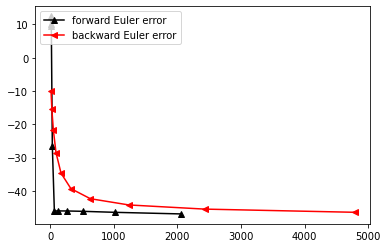

In [7]:
F_i = np.zeros(steps)
B_i = np.zeros(steps)

for s in range(steps):
    f_s, f_a, F_i[s] =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(-23*f_s[-1])))
    b_s, b_a, B_i[s] =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(-23*b_s[-1])))

plt.plot(F_i, F_e, color='black', marker='^')
plt.plot(B_i, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

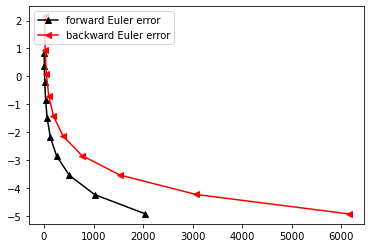

In [8]:
F_i = np.zeros(steps)
B_i = np.zeros(steps)

for s in range(steps):
    f_s, f_a, F_i[s] =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(f_s[-1])))
    b_s, b_a, B_i[s] =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(b_s[-1])))

plt.plot(F_i, F_e, color='black', marker='^')
plt.plot(B_i, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

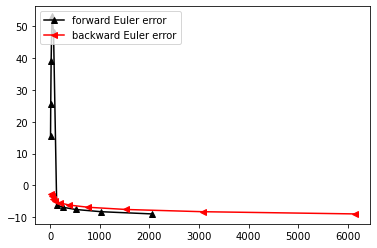

In [9]:
F_i = np.zeros(steps)
B_i = np.zeros(steps)

for s in range(steps):
    f_s, f_a, F_i[s] =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(np.array([-f_s[-1], -100*f_s[-1]]))))
    b_s, b_a, B_i[s] =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(np.array([-b_s[-1], -100*b_s[-1]]))))

plt.plot(F_i, F_e, color='black', marker='^')
plt.plot(B_i, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

From these experiments, we can see when h is small Forward Euler is better. Since when h is small and n is large, to achieve the same error, Forward Euler needs much less steps. When h is large, we may want to choose Backward Euler since it is stable while Forward Euler may produce bad results.

##### c.For one fixed h plot graphs

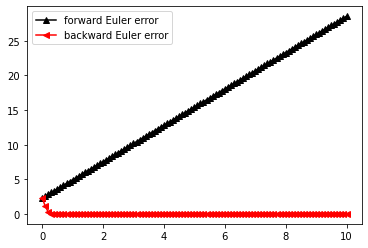

In [10]:
#choose h=0.01
h = 0.1
upper_interval = 10

f_s, f_a, _ =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(-23*np.array(f_s)), axis=1))
b_s, b_a, B_i =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(-23*np.array(b_s)), axis=1))

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

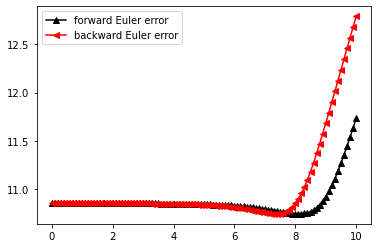

In [11]:
h = 0.1
upper_interval = 10

f_s, f_a, _ =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(np.array(f_s)), axis=1))
b_s, b_a, B_i =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(np.array(b_s)), axis=1))

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

Here I choose a small h=0.1 and it can shown that (i)Backward Method performs better and it is much stable. (ii) Forward and Backward is very similar since they are both first order and Forward is a little better in this case. We can see from the following that Forward and Backward is nearly the same when h is small.

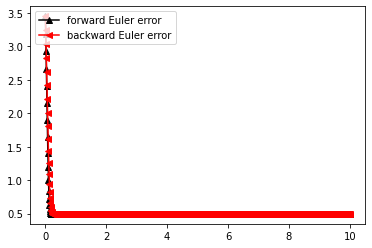

In [12]:
#choose h=0.01
h = 0.01
upper_interval = 10

f_s, f_a, _ =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(-23*np.array(f_s)), axis=1))
b_s, b_a, B_i =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(-23*np.array(b_s)), axis=1))

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

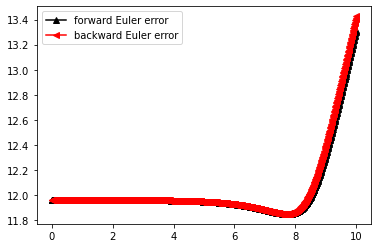

In [13]:
h = 0.01
upper_interval = 10

f_s, f_a, _ =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(np.array(f_s)), axis=1))
b_s, b_a, B_i =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(np.array(b_s)), axis=1))

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

For case3 we also plot this.

<ipython-input-63-8848e8a8c9af>:10: RuntimeWarning: divide by zero encountered in log
  F_e.append(np.log(np.linalg.norm([e0,e1])))
<ipython-input-63-8848e8a8c9af>:15: RuntimeWarning: divide by zero encountered in log
  B_e.append(np.log(np.linalg.norm([e0,e1])))


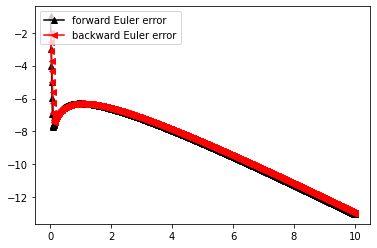

In [63]:
h = 0.01
upper_interval = 10

F_e = []
B_e = []
f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
for i in range(f_a.shape[0]):
    e0 = f_a[i][0]-np.exp(-f_s[i])
    e1 = f_a[i][1]-np.exp(-100*f_s[i])
    F_e.append(np.log(np.linalg.norm([e0,e1])))
b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
for i in range(b_a.shape[0]):
    e0 = b_a[i][0]-np.exp(-b_s[i])
    e1 = b_a[i][1]-np.exp(-100*b_s[i])
    B_e.append(np.log(np.linalg.norm([e0,e1])))

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.legend(['forward Euler error', 'backward Euler error'], loc='upper left')
plt.show()

We can get a similar conclusion like we get in (i) and (ii)

##### Plot the overimposed graphs of the computed solutions and the exact solution

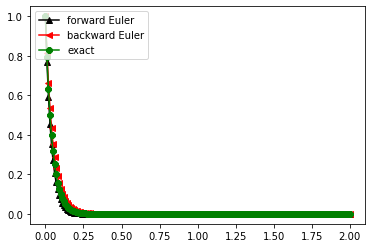

In [16]:
#choose h=0.01
h = 0.01
upper_interval = 2

f_s, f_a, _ =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(-23*np.array(f_s)), axis=1))
b_s, b_a, B_i =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(-23*np.array(b_s)), axis=1))

plt.plot(f_s, f_a, color='black', marker='^')
plt.plot(b_s, b_a, color='red', marker='<')
plt.plot(f_s, np.exp(-23*np.array(f_s)), color='green', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'exact'], loc='upper left')
plt.show()

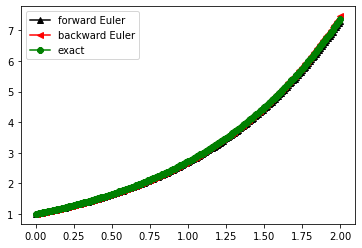

In [17]:
#choose h=0.01
h = 0.01
upper_interval = 2

f_s, f_a, _ =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(np.array(f_s)), axis=1))
b_s, b_a, B_i =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(np.array(b_s)), axis=1))

plt.plot(f_s, f_a, color='black', marker='^')
plt.plot(b_s, b_a, color='red', marker='<')
plt.plot(f_s, np.exp(np.array(f_s)), color='green', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'exact'], loc='upper left')
plt.show()

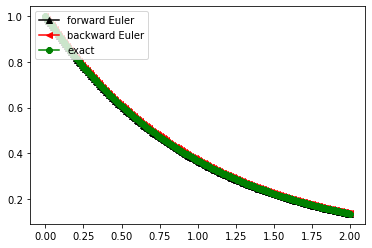

In [18]:
#choose h=0.01
h = 0.01
upper_interval = 2

f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)

plt.plot(f_s, f_a[:,0], color='black', marker='^')
plt.plot(b_s, b_a[:,0], color='red', marker='<')
plt.plot(f_s, np.exp(-np.array(f_s)), color='green', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'exact'], loc='upper left')
plt.show()

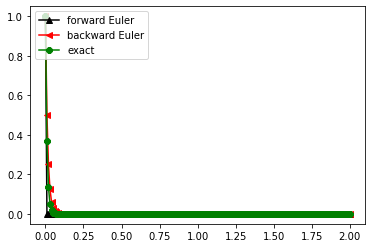

In [19]:
#choose h=0.01
h = 0.01
upper_interval = 2

f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)

plt.plot(f_s, f_a[:,1], color='black', marker='^')
plt.plot(b_s, b_a[:,1], color='red', marker='<')
plt.plot(f_s, np.exp(-100*np.array(f_s)), color='green', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'exact'], loc='upper left')
plt.show()

We can see that for the second term(-100), backward euler is closer.

#### 3.implement Runge's second order method and The Runge-Kutta method

In [37]:
#I get some guidance from another class note. Assume it is autonomous.
import numpy as np
import math
from numpy.linalg import inv
from copy import deepcopy

def Runge(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        s1 = eval(func_name)(deepcopy(y_t[i-1,:]))
        s2 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s1/2)
        y_t[i,:] = y_t[i-1,:]+h*s2
    return s_t, y_t, 2*num_interval

def Runge_Kutta(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        s1 = eval(func_name)(deepcopy(y_t[i-1,:]))
        s2 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s1/2)
        s3 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s2/2)
        s4 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s3)
        y_t[i,:] = y_t[i-1,:]+h*(s1/6+s2/3+s3/3+s4/6)
    return s_t, y_t, 4*num_interval

steps = 10
H = [ 1*pow(0.5, steps-i) for i in range(steps)]
H_p = [np.log(i) for i in H]

##### a. compute errors and compare the four methods

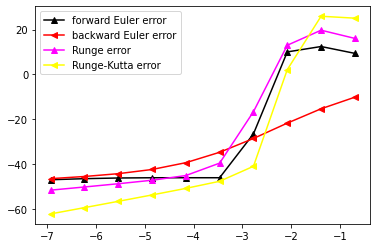

In [39]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

for s in range(steps):
    f_s, f_a, _ =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(-23*f_s[-1])))
    b_s, b_a, _ =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(-23*b_s[-1])))
    
    r_s, r_a, _ =  Runge('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    R_e[s] = np.log(np.linalg.norm(r_a[-1]-np.exp(-23*r_s[-1])))
    rk_s, rk_a, _ =  Runge_Kutta('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    RK_e[s] = np.log(np.linalg.norm(rk_a[-1]-np.exp(-23*rk_s[-1])))
    

plt.plot(H_p, F_e, color='black', marker='^')
plt.plot(H_p, B_e, color='red', marker='<')
plt.plot(H_p, R_e, color='magenta', marker='^')
plt.plot(H_p, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

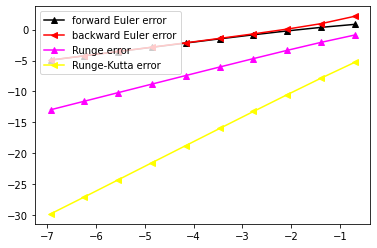

In [41]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

for s in range(steps):
    f_s, f_a, _ =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(f_s[-1])))
    b_s, b_a, _ =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(b_s[-1])))
    
    r_s, r_a, _ =  Runge('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    R_e[s] = np.log(np.linalg.norm(r_a[-1]-np.exp(r_s[-1])))
    rk_s, rk_a, _ =  Runge_Kutta('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    RK_e[s] = np.log(np.linalg.norm(rk_a[-1]-np.exp(rk_s[-1])))

plt.plot(H_p, F_e, color='black', marker='^')
plt.plot(H_p, B_e, color='red', marker='<')
plt.plot(H_p, R_e, color='magenta', marker='^')
plt.plot(H_p, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

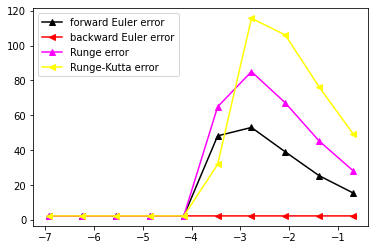

In [42]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

for s in range(steps):
    f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(f_s[-1])))
    b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(b_s[-1])))
    
    r_s, r_a, _ =  Runge('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    R_e[s] = np.log(np.linalg.norm(r_a[-1]-np.exp(r_s[-1])))
    rk_s, rk_a, _ =  Runge_Kutta('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    RK_e[s] = np.log(np.linalg.norm(rk_a[-1]-np.exp(rk_s[-1])))

plt.plot(H_p, F_e, color='black', marker='^')
plt.plot(H_p, B_e, color='red', marker='<')
plt.plot(H_p, R_e, color='magenta', marker='^')
plt.plot(H_p, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

##### a.Comment

Forward Euler and Backward Euler are both the first-order method, so we can see when h is small enough they share a similar error result. Runge method is second-order and Runge-Kutta method is fourth-order method， so we can see Runge-Kutta converges faster than Runge method and they are both faster than Forward Euler and Backward Euler methods. 

We also can see that Backward Euler performs well when h is large and this experiment result shows the stability of Backward Euler. For Forward Euler, Runge and Runge-Kutta methods, they are not stable when h is large.

Also，from the theoretical aspect， we know when h is larger than $-\frac{2}{\lambda}$ we will meet instability for Forward Euler method, Runge and Runge-Kutta methods. As we can see, (i) and (iii) are unstable when h is larger than $-\frac{2}{\lambda}$. And for (ii) we know it is always stable since h $\ge$ -2. For Backward Euler, we know it is always stable.

##### b. consider the extra work required when computing with the backward Euler, Runge and Runge-Kutta methods.

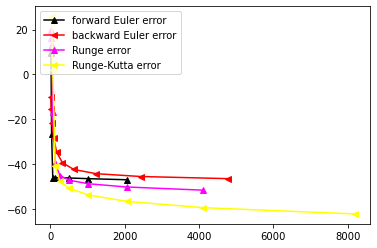

In [43]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)


for s in range(steps):
    f_s, f_a, F_i[s] =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(-23*f_s[-1])))
    b_s, b_a, B_i[s] =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(-23*b_s[-1])))
    
    r_s, r_a, R_i[s] =  Runge('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    R_e[s] = np.log(np.linalg.norm(r_a[-1]-np.exp(-23*r_s[-1])))
    rk_s, rk_a, RK_i[s] =  Runge_Kutta('i_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    RK_e[s] = np.log(np.linalg.norm(rk_a[-1]-np.exp(-23*rk_s[-1])))
    

plt.plot(F_i, F_e, color='black', marker='^')
plt.plot(B_i, B_e, color='red', marker='<')
plt.plot(R_i, R_e, color='magenta', marker='^')
plt.plot(RK_i, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

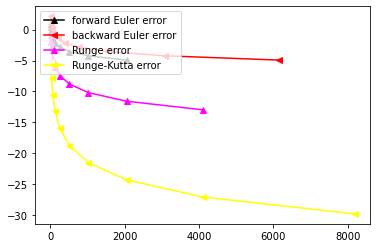

In [44]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

for s in range(steps):
    f_s, f_a, F_i[s] =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(f_s[-1])))
    b_s, b_a, B_i[s] =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(b_s[-1])))
    
    r_s, r_a, R_i[s] =  Runge('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    R_e[s] = np.log(np.linalg.norm(r_a[-1]-np.exp(r_s[-1])))
    rk_s, rk_a, RK_i[s] =  Runge_Kutta('ii_func', y_init=np.array([[1]]), t_range=[0,2], h=H[s])
    RK_e[s] = np.log(np.linalg.norm(rk_a[-1]-np.exp(rk_s[-1])))

plt.plot(F_i, F_e, color='black', marker='^')
plt.plot(B_i, B_e, color='red', marker='<')
plt.plot(R_i, R_e, color='magenta', marker='^')
plt.plot(RK_i, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

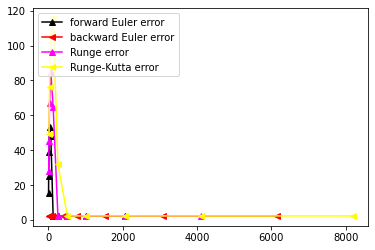

In [45]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

for s in range(steps):
    f_s, f_a, F_i[s] =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    F_e[s] = np.log(np.linalg.norm(f_a[-1]-np.exp(f_s[-1])))
    b_s, b_a, B_i[s] =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    B_e[s] = np.log(np.linalg.norm(b_a[-1]-np.exp(b_s[-1])))
    
    r_s, r_a, R_i[s] =  Runge('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    R_e[s] = np.log(np.linalg.norm(r_a[-1]-np.exp(r_s[-1])))
    rk_s, rk_a, RK_i[s] =  Runge_Kutta('iii_func', y_init=np.array([[1],[1]]), t_range=[0,2], h=H[s])
    RK_e[s] = np.log(np.linalg.norm(rk_a[-1]-np.exp(rk_s[-1])))

plt.plot(F_i, F_e, color='black', marker='^')
plt.plot(B_i, B_e, color='red', marker='<')
plt.plot(R_i, R_e, color='magenta', marker='^')
plt.plot(RK_i, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

From these experiments, we can see when h is small Runge_Kutta is better than Runge, and Runge is better Forward Euler and Backward Euler. Since when h is small and n is large, to achieve the same error, Runge_Kutta and Runge needs much less steps. 

##### c.For one fixed h plot graphs

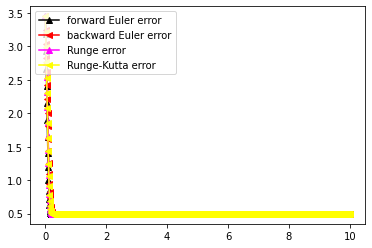

In [85]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

h = 0.01
upper_interval = 10


f_s, f_a, _ =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(-23*np.array(f_s)), axis=1))
b_s, b_a, _ =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(-23*np.array(b_s)), axis=1))
    
r_s, r_a, _ =  Runge('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
R_e = np.log(np.linalg.norm(r_a-np.exp(-23*np.array(r_s)), axis=1))
rk_s, rk_a, _ =  Runge_Kutta('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
RK_e = np.log(np.linalg.norm(rk_a-np.exp(-23*np.array(rk_s)), axis=1))
    

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.plot(r_s, R_e, color='magenta', marker='^')
plt.plot(rk_s, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

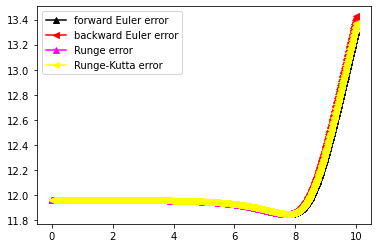

In [86]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

h = 0.01
upper_interval = 10


f_s, f_a, _ =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(np.array(f_s)), axis=1))
b_s, b_a, _ =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(np.array(b_s)), axis=1))
    
r_s, r_a, _ =  Runge('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
R_e = np.log(np.linalg.norm(r_a-np.exp(np.array(r_s)), axis=1))
rk_s, rk_a, _ =  Runge_Kutta('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
RK_e = np.log(np.linalg.norm(rk_a-np.exp(np.array(rk_s)), axis=1))
    

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.plot(r_s, R_e, color='magenta', marker='^')
plt.plot(rk_s, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

<ipython-input-87-5a66a76afcc2>:14: RuntimeWarning: divide by zero encountered in log
  F_e.append(np.log(np.linalg.norm([e0,e1])))
<ipython-input-87-5a66a76afcc2>:20: RuntimeWarning: divide by zero encountered in log
  B_e.append(np.log(np.linalg.norm([e0,e1])))
<ipython-input-87-5a66a76afcc2>:26: RuntimeWarning: divide by zero encountered in log
  R_e.append(np.log(np.linalg.norm([e0,e1])))
<ipython-input-87-5a66a76afcc2>:32: RuntimeWarning: divide by zero encountered in log
  RK_e.append(np.log(np.linalg.norm([e0,e1])))


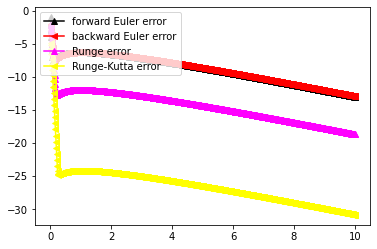

In [87]:
F_e = []
B_e = []
R_e = []
RK_e = []

h = 0.01
upper_interval = 10


f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
for i in range(f_a.shape[0]):
    e0 = f_a[i][0]-np.exp(-f_s[i])
    e1 = f_a[i][1]-np.exp(-100*f_s[i])
    F_e.append(np.log(np.linalg.norm([e0,e1])))
    
b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
for i in range(b_a.shape[0]):
    e0 = b_a[i][0]-np.exp(-b_s[i])
    e1 = b_a[i][1]-np.exp(-100*b_s[i])
    B_e.append(np.log(np.linalg.norm([e0,e1])))
    
r_s, r_a, _ =  Runge('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
for i in range(r_a.shape[0]):
    e0 = r_a[i][0]-np.exp(-r_s[i])
    e1 = r_a[i][1]-np.exp(-100*r_s[i])
    R_e.append(np.log(np.linalg.norm([e0,e1])))

rk_s, rk_a, _ =  Runge_Kutta('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
for i in range(f_a.shape[0]):
    e0 = rk_a[i][0]-np.exp(-rk_s[i])
    e1 = rk_a[i][1]-np.exp(-100*rk_s[i])
    RK_e.append(np.log(np.linalg.norm([e0,e1])))
    

plt.plot(f_s, F_e, color='black', marker='^')
plt.plot(b_s, B_e, color='red', marker='<')
plt.plot(r_s, R_e, color='magenta', marker='^')
plt.plot(rk_s, RK_e, color='yellow', marker='<')
plt.legend(['forward Euler error', 'backward Euler error', 'Runge error', 'Runge-Kutta error'], loc='upper left')
plt.show()

Here we can see in the second case, all methods are not accurate due to the problem itself. Its answer is $e^x$ so the error explodes.

##### Plot the overimposed graphs of the computed solutions and the exact solution

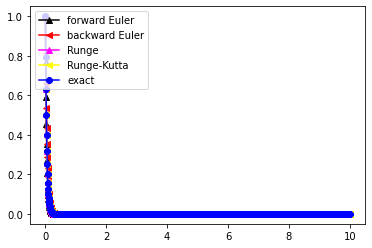

In [88]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

h = 0.01
upper_interval = 10


f_s, f_a, _ =  forward_Euler('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(-23*np.array(f_s)), axis=1))
b_s, b_a, _ =  backward_Euler('i_func', 'i_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(-23*np.array(b_s)), axis=1))
    
r_s, r_a, _ =  Runge('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
R_e = np.log(np.linalg.norm(r_a-np.exp(-23*np.array(r_s)), axis=1))
rk_s, rk_a, _ =  Runge_Kutta('i_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
RK_e = np.log(np.linalg.norm(rk_a-np.exp(-23*np.array(rk_s)), axis=1))
    

plt.plot(f_s, f_a, color='black', marker='^')
plt.plot(b_s, b_a, color='red', marker='<')
plt.plot(r_s, r_a, color='magenta', marker='^')
plt.plot(rk_s, rk_a, color='yellow', marker='<')
plt.plot(f_s, np.exp(-23*np.array(f_s)), color='blue', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'Runge', 'Runge-Kutta ','exact'], loc='upper left')
plt.show()

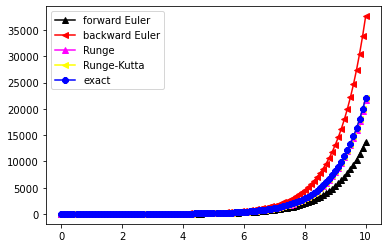

In [89]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

h = 0.1
upper_interval = 10


f_s, f_a, _ =  forward_Euler('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
F_e = np.log(np.linalg.norm(f_a-np.exp(np.array(f_s)), axis=1))
b_s, b_a, _ =  backward_Euler('ii_func', 'ii_diff_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
B_e = np.log(np.linalg.norm(b_a-np.exp(np.array(b_s)), axis=1))
    
r_s, r_a, _ =  Runge('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
R_e = np.log(np.linalg.norm(r_a-np.exp(np.array(r_s)), axis=1))
rk_s, rk_a, _ =  Runge_Kutta('ii_func', y_init=np.array([[1]]), t_range=[0,upper_interval], h=h)
RK_e = np.log(np.linalg.norm(rk_a-np.exp(np.array(rk_s)), axis=1))
    

plt.plot(f_s, f_a, color='black', marker='^')
plt.plot(b_s, b_a, color='red', marker='<')
plt.plot(r_s, r_a, color='magenta', marker='^')
plt.plot(rk_s, rk_a, color='yellow', marker='<')
plt.plot(f_s, np.exp(np.array(f_s)), color='blue', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'Runge', 'Runge-Kutta ','exact'], loc='upper left')
plt.show()

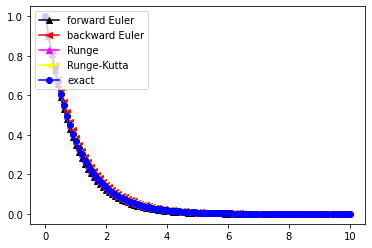

In [91]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

h = 0.1
upper_interval = 10


f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
    
r_s, r_a, _ =  Runge('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
rk_s, rk_a, _ =  Runge_Kutta('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
    

plt.plot(f_s, f_a[:,0], color='black', marker='^')
plt.plot(b_s, b_a[:,0], color='red', marker='<')
plt.plot(r_s, r_a[:,0], color='magenta', marker='^')
plt.plot(rk_s, rk_a[:,0], color='yellow', marker='<')
plt.plot(f_s, np.exp(-np.array(f_s)), color='blue', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'Runge', 'Runge-Kutta ','exact'], loc='upper left')
plt.show()

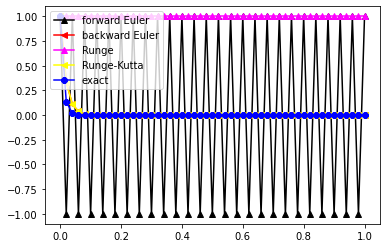

In [99]:
F_e = np.zeros(steps)
B_e = np.zeros(steps)
R_e = np.zeros(steps)
RK_e = np.zeros(steps)

F_i = np.zeros(steps)
B_i = np.zeros(steps)
R_i = np.zeros(steps)
RK_i = np.zeros(steps)

h = 0.02
upper_interval = 1


f_s, f_a, _ =  forward_Euler('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
b_s, b_a, _ =  backward_Euler('iii_func', 'iii_diff_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
    
r_s, r_a, _ =  Runge('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
rk_s, rk_a, _ =  Runge_Kutta('iii_func', y_init=np.array([[1],[1]]), t_range=[0,upper_interval], h=h)
    

plt.plot(f_s, f_a[:,1], color='black', marker='^')
plt.plot(b_s, b_a[:,1], color='red', marker='<')
plt.plot(r_s, r_a[:,1], color='magenta', marker='^')
plt.plot(rk_s, rk_a[:,1], color='yellow', marker='<')
plt.plot(f_s, np.exp(-100*np.array(f_s)), color='blue', marker='8')
plt.legend(['forward Euler', 'backward Euler', 'Runge', 'Runge-Kutta ','exact'], loc='upper left')
plt.show()

From these picures we can see if we use a large h, we should use Backward Euler method since it is much more stable. Considering convergence rate, we should choose in the order: RK, Range, Forward or Backward Euler. In the last picture, we can see Forward Euler is extremely unstable when h is large. This is caused by the problem nature since $\gamma$ = -100. For case1, $\gamma$=-1 so forward euler is more stable. For case2, it will lead to explosure since $\gamma$ = 1. 